In [1]:
import pandas as pd
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt


In [2]:
x_1 = []
y_1 = []

In [3]:
with open('/content/1.txt', 'r') as f:
    for line in f:
      line = line.split(',')
      x_1.append(float(line[0]))
      y_1.append(float(line[1]))

In [4]:
class PearsonnCorrelation:
  def __init__(self, x, y):
    self.x = x
    self.y = y
    self.sigma_x = np.std(self.x, ddof=1)
    self.bins = [0.3,0.5,0.7,0.9,1]
    self.corr = ['Слабая корреляция','Умеренная корреляция','Заметная корреляция','Высокая корреляция','Очень высокая корреляция']
    self.n = len(x)
    self.coef = sum([elem**2 for elem in self.x]) / self.n**0.5
    self.all_functions()

  def calculate_sigma_x(self):
    self.sigma_x = self.avg.x

  def calculate(self):
    self.avg_x = np.mean(self.x)
    self.avg_y = np.mean(self.y)

  def all_functions(self):
    self.calculate()
    self.calculate_xy()
    self.calculate_S()
    self.calculate_r()

  def calculate_xy(self):
    data = []
    for i in range(self.n):
      data.append(self.x[i] * self.y[i])
    self.xy = np.sum(data) / self.n

  def calculate_S(self):
    self.s_x = [(self.x[i]**2 - self.avg_x**2) / self.n for i in range(self.n)]
    self.s_y = [(self.y[i]**2 - self.avg_y**2) / self.n for i in range(self.n)]

  def calculate_r(self):
    self.r= (self.xy - self.avg_x * self.avg_y) / (np.sqrt(np.sum(self.s_x)) * np.sqrt(np.sum(self.s_y)))

  def get_value(self):
    self.correlation = self.corr[np.digitize([self.r], self.bins)[0]]
    print(f'R значение = {self.r}\n По таблице Чедока уровень корреляции - {self.correlation}')
    return self.r

In [5]:
pearson = PearsonnCorrelation(x_1, y_1)

In [6]:
class check_Pearsonn:
  def __init__(self, x, y):
    self.Object = PearsonnCorrelation(x, y)
    self.r = self.Object.get_value()
    self.n = len(x)
    self.h = ['Отвергается','Не отвергается']

  def calculate_t(self):
    self.t = self.r * np.sqrt(self.n - 2) / np.sqrt(1 - self.r**2)

  def get_value(self):
    self.calculate_t_critical()
    self.calculate_t()
    print(f'Полученное значение статистики {self.t}, критическое значение = {self.t_critical}')
    return self.h[self.t<self.t_critical]

  def calculate_t_critical(self):
      self.t_critical = stats.t.ppf(0.975, self.n - 2)

In [7]:
Object = check_Pearsonn(x_1, y_1)
print("Нулевая гипотеза ",Object.get_value())

R значение = 0.9840998696798257
 По таблице Чедока уровень корреляции - Очень высокая корреляция
Полученное значение статистики 54.84917579274876, критическое значение = 1.984467454426692
Нулевая гипотеза  Отвергается


<ipython-input-6-8d0f5d106ec4>:15: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  return self.h[self.t<self.t_critical]


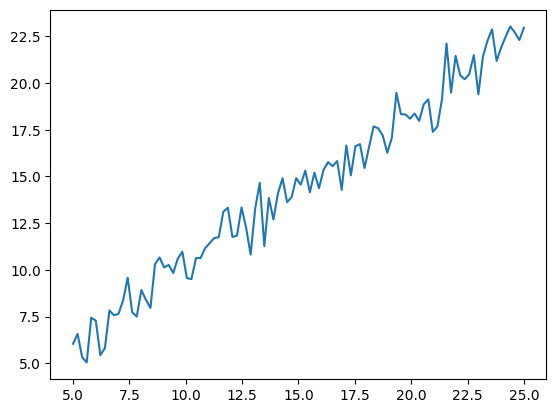

In [10]:
import matplotlib.pyplot as plt
plt.plot(x_1,y_1)

In [11]:
class Regression:
  def __init__(self, x, y):
    self.x = x
    self.y = y
    self.all_functions()

  def all_functions(self):
    self.linear_regression_analytical()
    self.plot()

  def linear_regression_analytical(self):
    self.x = np.array(self.x)
    self.y = np.array(self.y)
    self.X = np.c_[np.ones(self.x.shape[0]), self.x]
    self.X_transpose = self.X.T
    self.beta = np.linalg.inv(self.X_transpose.dot(self.X)).dot(self.X_transpose).dot(self.y)

  def plot(self):
    self.y_pred = self.beta[0] + self.beta[1] * self.x
    # Создание графика
    plt.scatter(self.x, self.y, color='blue', label='Данные')
    plt.plot(self.x, self.y_pred, color='red', label='Линейная регрессия')
    plt.xlabel('Объясняющая переменная (x)')
    plt.ylabel('Результирующая переменная (y)')
    plt.title('Парная зависимость y от x')
    plt.legend()
    plt.show()

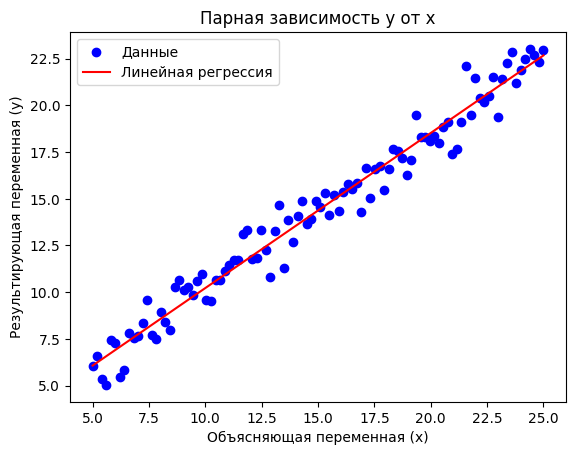

In [12]:
regr = Regression(x_1, y_1)

In [13]:
class Fisher:
    def __init__(self, regr, PearsonnCorrelation):
        self.y_pred = regr.y_pred
        self.level = 0.95
        self.Object = PearsonnCorrelation
        self.y = self.Object.y
        self.x = self.Object.x
        self.y_avg = self.Object.avg_y  # Среднее значение по y
        self.n = len(self.x)  # Число наблюдений
        self.d_theta = len(regr.beta)  # Размерность вектора параметров (количество коэффициентов)
        self.state = ['Нулевая гипотеза не отвергается', 'Нулевая гипотеза отвергается']
        self.all_function()

    def all_function(self):
        self.calculate_s_mod_squared()  # Вычисление Sмод^2
        self.calculate_s_total_squared()  # Вычисление Sобщ^2
        self.calculate_f()  # Расчет F-статистики
        self.calculate_fisher()  # Критическое значение F
        self.get_fisher()

    def calculate_s_mod_squared(self):
        """Вычисление Sмод^2 — средний квадрат ошибок модели."""
        s_mod_sum = sum([(self.y[i] - self.y_pred[i])**2 for i in range(len(self.y))])
        self.s_mod_squared = s_mod_sum / (self.n - self.d_theta)  # Sмод^2 = ∑(yi - ŷ(xi))^2 / (n - dθ)

    def calculate_s_total_squared(self):
        """Вычисление Sобщ^2 — общая дисперсия (используем для сравнения)."""
        s_total_sum = sum([(self.y[i] - self.y_avg)**2 for i in range(len(self.y))])
        self.s_total_squared = s_total_sum / (self.n - 1)  # Sобщ^2 = ∑(yi - y_avg)^2 / (n - 1)

    def calculate_f(self):
        """Расчет F-статистики: отношение максимальной и минимальной дисперсии."""
        s_m_squared = min(self.s_mod_squared, self.s_total_squared)  # SМ^2 — минимальная из двух
        s_b_squared = max(self.s_mod_squared, self.s_total_squared)  # SB^2 — максимальная из двух
        self.f_pot = s_b_squared / s_m_squared  # F = SB^2 / SM^2

    def calculate_fisher(self):
        """Получение критического значения F для заданного уровня значимости."""
        self.f_critical = stats.f.ppf(1 - self.level, dfn=self.n - self.d_theta, dfd=self.n - 1)

    def get_fisher(self):
        """Проверка гипотезы на основе F-теста."""
        print(f'F-статистика: {self.f_pot}, Критическое значение F: {self.f_critical}')
        print(f'{self.state[self.f_pot > self.f_critical]}: полученное значение F = {self.f_pot}, критическое значение F = {self.f_critical}')


In [14]:
fisher = Fisher(regr,pearson)

F-статистика: 31.378101870137595, Критическое значение F: 0.7165989462583362
Нулевая гипотеза отвергается: полученное значение F = 31.378101870137595, критическое значение F = 0.7165989462583362


<ipython-input-13-0c810b37580c>:44: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  print(f'{self.state[self.f_pot > self.f_critical]}: полученное значение F = {self.f_pot}, критическое значение F = {self.f_critical}')


In [30]:
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt

class checkRegression:
    def __init__(self, regr, Fisher):
        self.regr = regr  # модель линейной регрессии
        self.fisher = Fisher  # объект класса Fisher для расчета F-статистики
        self.ma = self.fisher.s_mod_squared ** 0.5  # стандартная ошибка свободного члена
        self.mb = (self.fisher.s_mod_squared / sum([xi**2 for xi in self.fisher.x])) ** 0.5  # стандартная ошибка коэффициента наклона

        # Расчет t-статистик для свободного члена и коэффициента наклона
        self.T_a = self.regr.beta[0] / self.ma
        self.T_b = self.regr.beta[1] / self.mb

        # Расчет предсказанных значений на 3 шага вперед
        self.deltas_x = [1.5 * i + max(self.fisher.x) for i in range(3)]
        self.deltas_y = [self.regr.beta[0] + self.regr.beta[1] * elem for elem in self.deltas_x]

        # Запуск расчетов
        self.check()
        self.calculate_prediction_interval()


    def check(self, alpha=0.05):
        # Критическое значение t для выбранного уровня значимости и степеней свободы
        t_critical = stats.t.ppf(1 - alpha / 2, df=self.fisher.n - 2)

        # Вывод критического значения t
        print(f"Критическое значение t: {t_critical}")

        # Проверка значимости свободного члена (a)
        print(f"T_a = {self.T_a}")
        if abs(self.T_a) > t_critical:
            print(f"Свободный член (a) значим: T_a = {self.T_a} > t_critical")
        else:
            print(f"Свободный член (a) незначим: T_a = {self.T_a} <= t_critical")

        # Проверка значимости коэффициента наклона (b)
        print(f"T_b = {self.T_b}")
        if abs(self.T_b) > t_critical:
            print(f"Коэффициент наклона (b) значим: T_b = {self.T_b} > t_critical")
        else:
            print(f"Коэффициент наклона (b) незначим: T_b = {self.T_b} <= t_critical")

        # Проверка значимости модели с помощью F-теста
        self.check_fisher()
        self.confidence_intervals()

    def check_fisher(self):
        # Проверка гипотезы на основе F-теста из класса Fisher
        print(f"F-статистика: {self.fisher.f_pot}, Критическое значение F: {self.fisher.f_critical}")
        if self.fisher.f_pot > self.fisher.f_critical:
            print("Модель значима: нулевая гипотеза отвергается.")
        else:
            print("Модель незначима: нулевая гипотеза не отвергается.")

    def calculate_prediction_interval(self, alpha=0.05):
        # Среднее значение и дисперсия x
        x_mean = np.mean(self.fisher.x)
        sigma_x_squared = np.var(self.fisher.x, ddof=1)

        # Критическое значение t для выбранного уровня значимости и степеней свободы
        t_critical = stats.t.ppf(1 - alpha / 2, df=self.fisher.n - 2)

        # Рассчет интервалов прогноза для каждого нового значения
        self.upper_bound = []
        self.lower_bound = []
        for x_0, y_pred in zip(self.deltas_x, self.deltas_y):
            E = t_critical * self.fisher.s_mod_squared ** 0.5 * np.sqrt(1 + (1 / self.fisher.n) + ((x_0 - x_mean) ** 2 / (self.fisher.n * sigma_x_squared)))
            self.upper_bound.append(y_pred + E)
            self.lower_bound.append(y_pred - E)

        # Вывод результатов
        for i, x_0 in enumerate(self.deltas_x):
            print(f"Прогнозный интервал для x_0 = {x_0}: [{self.lower_bound[i]}, {self.upper_bound[i]}]")

    def confidence_intervals(self, alpha=0.05):
        self.calculate_prediction_interval()
        # Критическое значение t для выбранного уровня значимости и степеней свободы
        t_critical = stats.t.ppf(1 - alpha / 2, df=self.fisher.n - 2)

        # Доверительный интервал для параметра a
        a_lower = self.regr.beta[0] - t_critical * self.ma
        a_upper = self.regr.beta[0] + t_critical * self.ma
        print(f"Доверительный интервал для a: [{a_lower}, {a_upper}]")

        # Доверительный интервал для параметра b
        b_lower = self.regr.beta[1] - t_critical * self.mb
        b_upper = self.regr.beta[1] + t_critical * self.mb
        print(f"Доверительный интервал для b: [{b_lower}, {b_upper}]")

        # Построение моделей для граничных значений интервалов
        self.plot_confidence_models(a_lower, a_upper, b_lower, b_upper)

    def plot_confidence_models(self, a_lower, a_upper, b_lower, b_upper):
        # Создаем массив значений x для построения графиков
        x_values = np.linspace(min(self.fisher.x), max(self.fisher.x), 100)

        # Вычисляем предсказанные значения y для граничных моделей
        y_model_lower = a_lower + b_lower * x_values  # Модель с минимальными значениями a и b
        y_model_upper = a_upper + b_upper * x_values  # Модель с максимальными значениями a и b

        # Основная модель
        y_model = self.regr.beta[0] + self.regr.beta[1] * x_values

        # Построение графиков
        plt.figure(figsize=(10, 6))
        plt.plot(x_values, y_model, label="Основная модель", color="blue")
        plt.plot(x_values, y_model_lower, label="Нижняя граница", linestyle="--", color="green")
        plt.plot(x_values, y_model_upper, label="Верхняя граница", linestyle="--", color="red")
        plt.plot(self.deltas_x, self.deltas_y, label='3 предсказанных значения', linestyle='--', color='purple')
        plt.plot(self.deltas_x, self.upper_bound, label='Верхняя граница для предсказанных значений', linestyle='--', color='red')
        plt.plot(self.deltas_x, self.lower_bound, label='Нижняя граница для предсказанных значений', linestyle='--', color='green')
        plt.scatter(self.fisher.x, self.fisher.y, color='black', label="Данные", zorder=7)
        plt.fill_between(x_values, y_model_lower, y_model_upper, color="gray", alpha=0.2, label="Доверительная область")
        plt.legend()
        plt.title("Модель линейной регрессии и доверительные интервалы")
        plt.xlabel("X")
        plt.ylabel("Y")
        plt.grid(True)
        plt.show()


Критическое значение t: 1.984467454426692
T_a = 2.1808191667113443
Свободный член (a) значим: T_a = 2.1808191667113443 > t_critical
T_b = 151.37117129746875
Коэффициент наклона (b) значим: T_b = 151.37117129746875 > t_critical
F-статистика: 31.378101870137595, Критическое значение F: 0.7165989462583362
Модель значима: нулевая гипотеза отвергается.
Прогнозный интервал для x_0 = 25.0: [20.88565107546124, 24.455243338320898]
Прогнозный интервал для x_0 = 26.5: [22.122385584553033, 25.708067572269638]
Прогнозный интервал для x_0 = 28.0: [23.35804133741846, 26.961970562444744]
Доверительный интервал для a: [0.17323999907397503, 3.6750086973659473]
Доверительный интервал для b: [0.8189735897940456, 0.840732238899643]


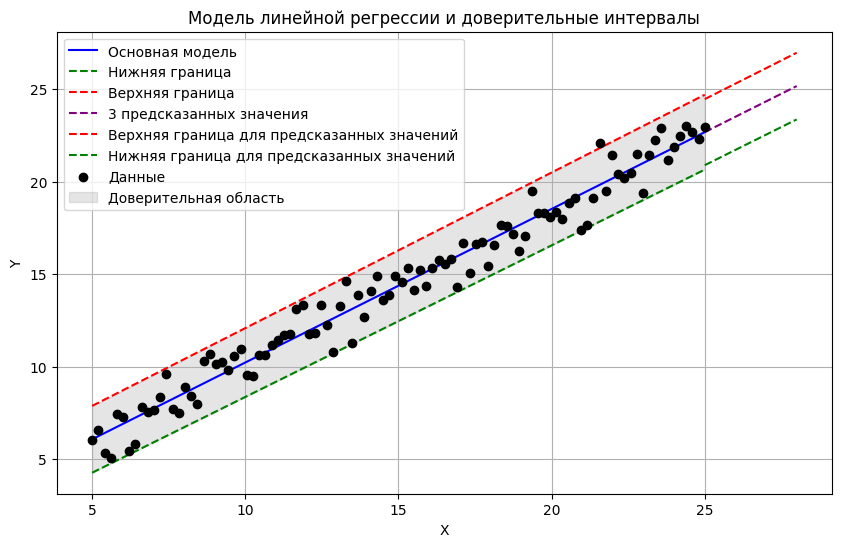

Прогнозный интервал для x_0 = 25.0: [20.88565107546124, 24.455243338320898]
Прогнозный интервал для x_0 = 26.5: [22.122385584553033, 25.708067572269638]
Прогнозный интервал для x_0 = 28.0: [23.35804133741846, 26.961970562444744]


In [31]:
result = checkRegression(regr,fisher)

In [17]:
df = pd.read_csv('/content/2.txt', names = ['Var_kol','Var_kach_1','Var_kach_2','Var_target'])

In [18]:
df.head(5)

,Var_kol,Var_kach_1,Var_kach_2,Var_target
0,6.414141,0.0,0.0,-4.970122
1,12.272727,0.0,0.0,-10.464931
2,6.212121,1.0,1.0,10.235564
3,19.545455,0.0,0.0,-15.219333
4,7.424242,1.0,0.0,9.865826


In [19]:
df.describe()

,Var_kol,Var_kach_1,Var_kach_2,Var_target
count,200.000000,200.000000,200.00000,200.000000
mean,15.000000,0.500000,0.49500,3.918406
std,5.846163,0.501255,0.50123,16.845305
min,5.000000,0.000000,0.00000,-19.668995
25%,10.000000,0.000000,0.00000,-11.872644
50%,15.000000,0.500000,0.00000,0.420846
75%,20.000000,1.000000,1.00000,19.526583
max,25.000000,1.000000,1.00000,33.827388


In [20]:
df[df['Var_kach_1'] == 1.0].count()

,0
Var_kol,100
Var_kach_1,100
Var_kach_2,100
Var_target,100


In [32]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

class ChowTest:
    def __init__(self, df, qualitative_vars, target_var, factor_var):
        self.df = df
        self.qualitative_vars = qualitative_vars  # List of qualitative variables
        self.target_var = target_var
        self.factor_var = factor_var
        self.models = {}  # Store models for each group
        self.rss = {}     # Store RSS for each model

    def perform_regression(self, df_subset):
        X = sm.add_constant(df_subset[self.factor_var])  # Add intercept term
        y = df_subset[self.target_var]
        model = sm.OLS(y, X).fit()
        return model

    def chow_test(self):
        full_model = self.perform_regression(self.df)
        rss_full = np.sum(full_model.resid ** 2)
        n = len(self.df)
        k = 2  # Number of parameters in linear regression (intercept and slope)

        f_stat_values = {}

        for qualitative_var in self.qualitative_vars:
            # Splitting the data based on the qualitative variable
            df_0 = self.df[self.df[qualitative_var] == 0]
            df_1 = self.df[self.df[qualitative_var] == 1]

            # Fit models for each group
            model_0 = self.perform_regression(df_0)
            model_1 = self.perform_regression(df_1)

            # Store models and RSS
            self.models[qualitative_var] = {'model_0': model_0, 'model_1': model_1}
            rss_0 = np.sum(model_0.resid ** 2)
            rss_1 = np.sum(model_1.resid ** 2)
            self.rss[qualitative_var] = {'rss_0': rss_0, 'rss_1': rss_1}

            # Chow test calculation
            f_stat = ((rss_full - (rss_0 + rss_1)) / k) / ((rss_0 + rss_1) / (n - 2 * k))
            f_stat_values[qualitative_var] = f_stat

            print(f"Chow Test for {qualitative_var}: F-statistic = {f_stat}")

        return f_stat_values

    def plot_regression(self):
        for qualitative_var in self.qualitative_vars:
            df_0 = self.df[self.df[qualitative_var] == 0]
            df_1 = self.df[self.df[qualitative_var] == 1]

            # Get model parameters
            model_0 = self.models[qualitative_var]['model_0']
            model_1 = self.models[qualitative_var]['model_1']

            # Create a range of values for plotting
            x_vals = np.linspace(self.df[self.factor_var].min(), self.df[self.factor_var].max(), 100)
            y_vals_0 = model_0.params[0] + model_0.params[1] * x_vals
            y_vals_1 = model_1.params[0] + model_1.params[1] * x_vals

            plt.figure(figsize=(10, 5))
            plt.scatter(df_0[self.factor_var], df_0[self.target_var], color='blue', label=f'{qualitative_var} = 0')
            plt.scatter(df_1[self.factor_var], df_1[self.target_var], color='green', label=f'{qualitative_var} = 1')
            plt.plot(x_vals, y_vals_0, color='blue', label=f'Regression for {qualitative_var} = 0')
            plt.plot(x_vals, y_vals_1, color='green', label=f'Regression for {qualitative_var} = 1')
            plt.title(f'Regression based on {qualitative_var}')
            plt.xlabel(self.factor_var)
            plt.ylabel(self.target_var)
            plt.legend(loc = 'upper left')
            plt.grid(True)
            plt.show()


Chow Test for Var_kach_1: F-statistic = 21606.746407078557
Chow Test for Var_kach_2: F-statistic = 1.0879572152500647


<ipython-input-21-bd6fa84f87b6>:63: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_vals_0 = model_0.params[0] + model_0.params[1] * x_vals
<ipython-input-21-bd6fa84f87b6>:64: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_vals_1 = model_1.params[0] + model_1.params[1] * x_vals


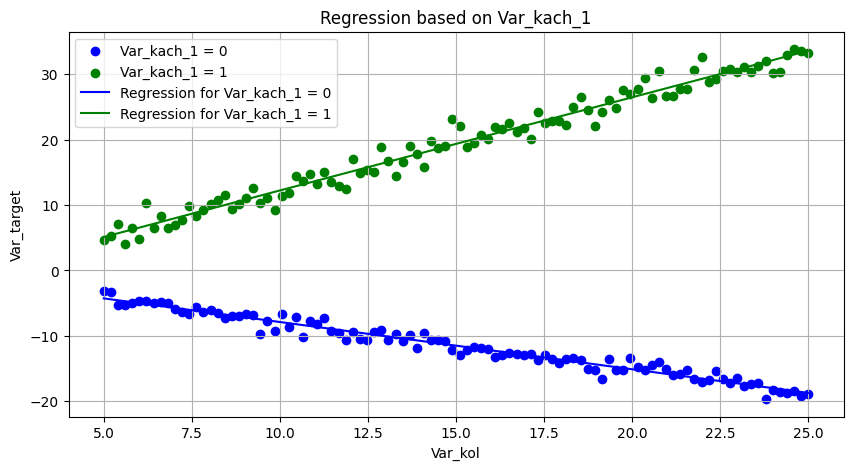

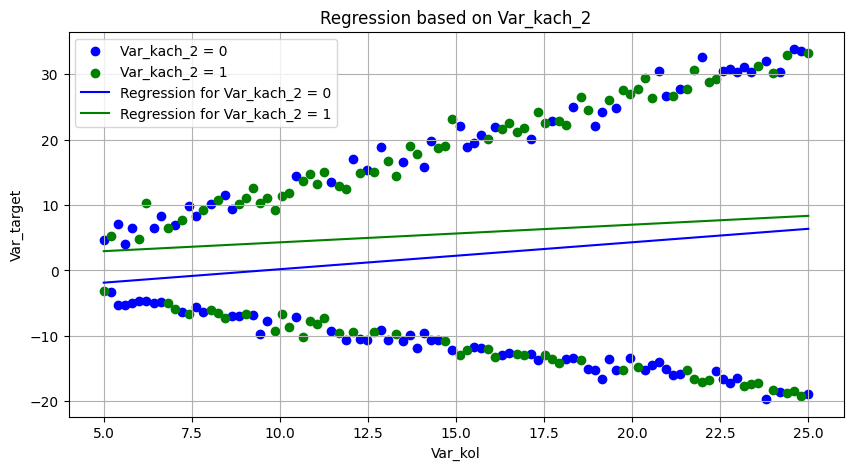

In [22]:
qualitative_vars = ['Var_kach_1', 'Var_kach_2']

# Instantiate the class and run the tests
chow_test = ChowTest(df, qualitative_vars=qualitative_vars, target_var='Var_target', factor_var='Var_kol')

# Perform Chow tests
chow_test.chow_test()

# Plot regression for each qualitative variable
chow_test.plot_regression()

In [23]:
df2 = pd.read_csv('/content/3.txt',names = ['x','y'])

In [24]:
df2.head()

,x,y
0,5.000000,4.193810
1,5.202020,2.531220
2,5.404040,-0.270461
3,5.606061,-1.014690
4,5.808081,-9.944906


In [25]:
df2['rank_x'] = df2['x'].rank()

In [26]:
df2.tail()

,x,y,rank_x
95,24.191919,-37.018160,96.0
96,24.393939,15.060174,97.0
97,24.595960,-19.932716,98.0
98,24.797980,9.740763,99.0
99,25.000000,3.616339,100.0


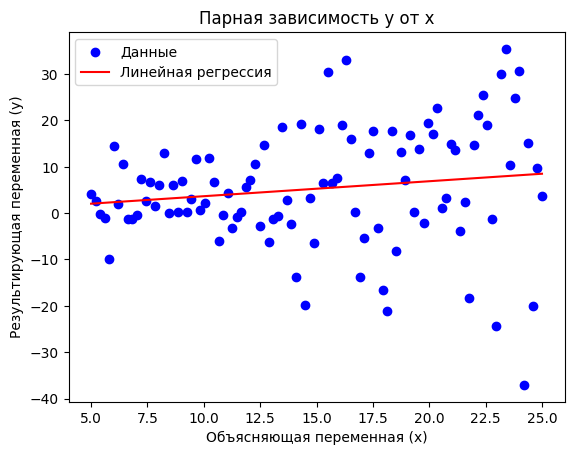

y= 0.32282432574567194x + 0.41215859994385307


In [27]:
regr1 = Regression(df2['x'],df2['y'])
print(f'y= {regr1.beta[1]}x + {regr1.beta[0]}')

F-статистика: 1.0122492321996122, Критическое значение F: 0.7165989462583362
Нулевая гипотеза отвергается: полученное значение F = 1.0122492321996122, критическое значение F = 0.7165989462583362
Критическое значение t: 1.984467454426692
T_a = 0.03256674595802888
Свободный член (a) незначим: T_a = 0.03256674595802888 <= t_critical
T_b = 4.105175995172768
Коэффициент наклона (b) значим: T_b = 4.105175995172768 > t_critical
F-статистика: 1.0122492321996122, Критическое значение F: 0.7165989462583362
Модель значима: нулевая гипотеза отвергается.
Прогнозный интервал для x_0 = 25.0: [-17.118717003094716, 34.084250490266015]
Прогнозный интервал для x_0 = 26.5: [-16.749877680057146, 34.683884144465466]
Прогнозный интервал для x_0 = 28.0: [-16.396512258777683, 35.29899170042302]
Доверительный интервал для a: [-24.702887548810278, 25.527204748697987]
Доверительный интервал для b: [0.1667690509674793, 0.4788796005238646]


<ipython-input-13-0c810b37580c>:44: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  print(f'{self.state[self.f_pot > self.f_critical]}: полученное значение F = {self.f_pot}, критическое значение F = {self.f_critical}')


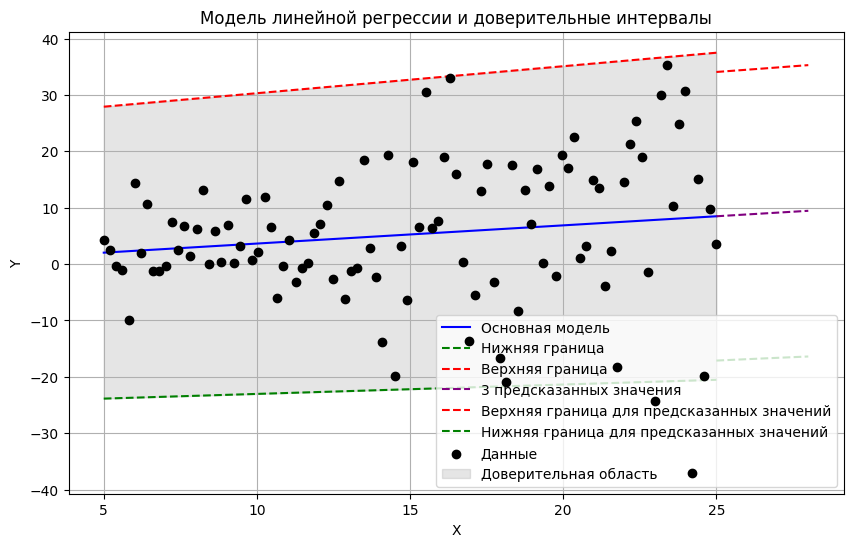

Прогнозный интервал для x_0 = 25.0: [-17.118717003094716, 34.084250490266015]
Прогнозный интервал для x_0 = 26.5: [-16.749877680057146, 34.683884144465466]
Прогнозный интервал для x_0 = 28.0: [-16.396512258777683, 35.29899170042302]


In [28]:
pearson1 = PearsonnCorrelation(df2['x'], df2['y'])
fisher1 = Fisher(regr1,pearson1)
result1 = checkRegression(regr1,fisher1)

In [33]:
df2['e'] = [df2['y'][i] - df2['x'][i] * regr1.beta[0] + regr1.beta[1] for i in range(100)]

In [34]:
class Check_Getero:
  def __init__(self,data, interval):
    self.data = data
    self.interval = interval
    self.n = len(self.data['x'])
    self.res_spearman = ['Полученное значение больше критического, гетеростидаксичность присутствует','Полученное значение меньше критического']
    print('Результаты теста Спирмана')
    self.rank()
    self.check_Spearman()

  def rank(self):
    self.data['e_rank'] = self.data['e'].rank()
    self.data['x_rank'] = self.data['x'].rank()

  def check_Spearman(self):
    self.rank_squared = np.sum((self.data['x_rank'] - self.data['e_rank']) ** 2)
    self.r_s = 1 - (6 * self.rank_squared) / (self.n * (self.n**2 - 1))
    self.t_s = self.r_s * (self.n-2)/(1 - self.r_s**2)**0.5
    self.t_cr = stats.t.ppf(1-self.interval/2,self.n - 2)
    print(self.res_spearman[self.t_s<self.t_cr])
    print(f'Критическое значение = {self.t_cr}, полученное значение = {self.t_s}')


In [35]:
Check_Getero(df2,0.05)

Результаты теста Спирмана
Полученное значение больше критического, гетеростидаксичность присутствует
Критическое значение = 1.984467454426692, полученное значение = 3.689741139616551


<ipython-input-34-42cc1ec05d31>:20: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  print(self.res_spearman[self.t_s<self.t_cr])


In [36]:
df2

,x,y,rank_x,e,e_rank,x_rank
0,5.000000,4.193810,1.0,2.455841,60.0,1.0
1,5.202020,2.531220,2.0,0.709987,55.0,2.0
2,5.404040,-0.270461,3.0,-2.174958,44.0,3.0
3,5.606061,-1.014690,4.0,-3.002452,39.0,4.0
4,5.808081,-9.944906,5.0,-12.015932,14.0,5.0
...,...,...,...,...,...,...
95,24.191919,-37.018160,96.0,-46.666243,1.0,96.0
96,24.393939,15.060174,97.0,5.328827,68.0,97.0
97,24.595960,-19.932716,98.0,-29.747328,3.0,98.0
98,24.797980,9.740763,99.0,-0.157113,51.0,99.0


In [96]:
from scipy.stats import f
class Goltfend_Kvandt_test:
  def __init__(self, data):
    self.data = data
    self.alpha = 0.05/2
    self.n = 3/8
    self.len = len(self.data['x'])
    self.res_len= int(len(self.data['x']) * self.n)
    self.data_new = []
    self.rss = []
    self.calculate_data()
    self.perform_test()


  def calculate_data(self):
    self.data_new.append(self.data.loc[:self.res_len].reset_index(drop = True))
    self.data_new.append(self.data.loc[self.len - self.res_len:].reset_index(drop = True))
    for i in range(2):
      self.create_regr(self.data_new[i],i)

  def create_regr(self, data,index):
    regr = self.regr_analytical(data['x'],data['y'])
    y_pred = [regr[0] + regr[1] * x for x in data['x']]
    y = data['y']
    rss = sum([(y_pred[i] - y[i])**2 for i in range(len(y))])
    rss /= len(y_pred)
    self.rss.append(rss)

  def regr_analytical(self,x,y):
    X = np.c_[np.ones(x.shape[0]), x]
    X_transpose = X.T
    beta = np.linalg.inv(X_transpose.dot(X)).dot(X_transpose).dot(y)
    return beta

  def calculate_f_statistic(self):
    rss1, rss2 = self.rss
    m1, m2 = self.res_len, self.res_len
    f_statistic = max(rss1, rss2) / min(rss1, rss2)
    return f_statistic, m1 - 1, m2 - 1

  def perform_test(self):
    f_statistic, d1, d2 = self.calculate_f_statistic()
    critical_value = f.ppf(1 - self.alpha, d1, d2)
    if f_statistic > critical_value:
        print(f"F-статистика: {f_statistic:.4f}, Критическое значение: {critical_value:.4f}")
        print("Дисперсии не равны, гетероскедастичность присутствует.")
    else:
        print(f"F-статистика: {f_statistic:.4f}, Критическое значение: {critical_value:.4f}")
        print("Дисперсии равны, гетероскедастичности нет.")


In [97]:
Obj = Goltfend_Kvandt_test(df2)

F-статистика: 9.8320, Критическое значение: 1.9421
Дисперсии не равны, гетероскедастичность присутствует.
